In [1]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
import scipy 
import cmath
from numba import objmode
from numpy.linalg import slogdet
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
import matplotlib.pyplot as plt

In [2]:
h = 0.2

dist = 0.5
sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)

wavenumber = 0.8j

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

combined = np.linalg.inv(mat2).dot(mat)
sign, logdet = slogdet(combined)
print(logdet)

-0.11725914620404754


In [3]:
x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))
rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)
print(rho_)

1.1325591948752118


In [3]:
evals, evects = np.linalg.eig(combined)

/home/xiaoshu/.conda/envs/opencl/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


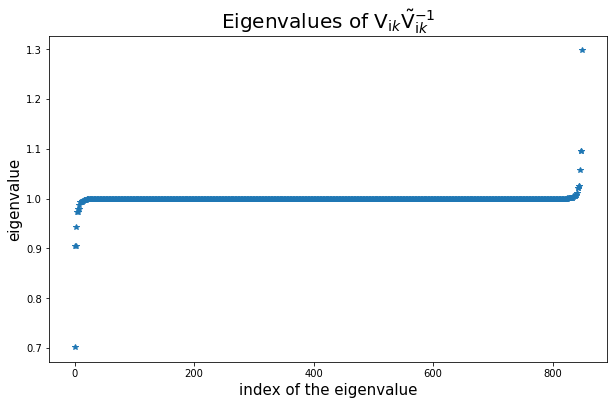

In [10]:
plt.figure(figsize = [10, 6])
plt.plot(range(len(evals)), sorted(evals), '*')
plt.xlabel('index of the eigenvalue', fontsize = 15)
plt.ylabel('eigenvalue', fontsize = 15)
plt.title('Eigenvalues of $\mathsf{V}_{\mathrm{i}k} \~\mathsf{V}_{\mathrm{i}k}^{-1}$', fontsize = 20)
plt.savefig('evals of VVtilde.pdf')

In [4]:
import krypy

In [8]:
#iter 100 times
dim_50 = [0.20783446977767484, 0.1293904157173525, 0.051067618845466164, 0.02252237497101278, 0.016645075046953003, 0.010784280031768727, 0.007055840658411374, 0.00333126287826241, 0.0020134714688728205, 0.0016222857498242053,0.0012319205301928764, 0.0009169187507584716, 0.0007015651079923258, 0.0005139858044919611, 0.000925676031054578,0.0008590692902175926, 0.0008342349532350531, 0.0008121771485276108, 0.0007879665922888011, 0.0009450269451528963, 0.001070625699803473, 0.0041474264815992735, 0.003914300002915393, 0.004595943853002871, 0.004583151031498217]
dim_60 = [0.20783446977767484, 0.1293904157173525, 0.051067618845466164, 0.02252237497101278, 0.016645075046953003,0.010784280031768727, 0.007055840658411374, 0.00333126287826241, 0.0020134714688728205, 0.0016222857498242053,0.0012319480954192208, 0.000916946315984816, 0.0006035095622259679, 0.0004159302587256033, 3.25048934485679e-05,3.410184738841752e-05, 5.893618437095716e-05, 8.365701212668014e-05, 0.0006631627372962413, 0.0006634119831790749,0.007411979265558124, 0.006644409318515759, 0.0066365661717408585, 0.004567930586544181, 0.0039037754133103564,0.003902173086189125, 0.004046762728823372, 0.004045236089634088, 0.003970782750677286, 0.003986178768401356]
dim_70 = [0.20783446977767484, 0.1293904157173525, 0.051067618845466164, 0.02252237497101278, 0.016645075046953003, 0.010784280031768727, 0.007055840658411374, 0.00333126287826241, 0.0020134714688728205, 0.0016222857498242053, 0.0012319480954192208, 0.000916946315984816, 0.0006035095622259679, 0.0004159302587256033, 0.00022874403459039713, 0.0001621372937534117, 0.00013730295677087206, 0.00011258212901514908, 0.00010489289546711185, 0.0010702480094957661, 0.001459615320365101, 0.002754512335433303, 0.0027641101248602603, 0.002638026444032204, 0.00264152173222816, 0.0026430505524267377, 0.0026483836947126345, 0.002586815895165735, 0.0025183621028662083, 0.0037308866716769962,0.0037053184317288467, 0.004633643720857217, 0.0043631640746753944, 0.004425857452523402, 0.004477447590328522]
dim_80 = [0.20783446977767484, 0.1293904157173525, 0.051067618845466164, 0.02252237497101278, 0.016645075046953003,0.010784280031768727, 0.007055840658411374, 0.00333126287826241, 0.0020134714688728205, 0.0016222857498242053,0.0012319480954192208, 0.000916946315984816, 0.0006035095622259679, 0.0004159302587256033, 0.00022874403459039713,0.0001621372937534117, 0.00013730295677087206, 0.00011258212901325546, 9.055250425245149e-05, 6.85688490013715e-05,5.1586330138246714e-05, 1.1283299745764405e-05, 2.088108917272197e-05, 3.0368107094508454e-05, 3.386339528857055e-05,3.5392215487148405e-05, 2.7793224904907448e-05, 2.9018848431832394e-05, 0.00017724756903445476, 0.00017631921880755994,0.0012648779142473742, 1.9765501405920576e-05, 1.9324513682146813e-05, 3.848270756824353e-05, 3.8676931917565774e-05,6.495423223468911e-05, 0.00013473102274904112, 0.0001336753998518347, 0.000133646136025981, 0.0001244423053682209]
dim_90 = [0.20783446977767484, 0.1293904157173525, 0.051067618845466164, 0.02252237497101278, 0.016645075046953003, 0.010784280031768727, 0.007055840658411374, 0.00333126287826241, 0.0020134714688728205, 0.0016222857498242053, 0.0012319480954192208, 0.000916946315984816, 0.0006035095622259679, 0.0004159302587256033, 0.00022874403459039713,0.0001621372937543585, 0.00013730295677276568, 0.00011258212901514908, 9.055250425434512e-05, 6.856884900326512e-05,5.158633014014034e-05, 3.465256248541003e-05, 2.5054773058452465e-05, 1.5567755138559605e-05, 1.2072466942603883e-05, 1.0543646744026029e-05, 9.018437333531964e-06, 1.7819921141316584e-05, 1.659429292175738e-05, 0.00038666642640422093,0.0003753347914662321, 0.0002721106480089744, 0.00025623875972944986, 0.0002816157304805572, 0.00027313300192053817,0.00027293877758068405, 0.00026786149202939394, 0.0002582268866771769, 0.00025398542644605217, 0.00013822053321274004,0.00014577043627193937, 0.00016477604914151602, 0.00015961429738703316, 0.0001721590307822059, 0.00017871937950778791]
dim_100 = [0.20783446977767484, 0.1293904157173525, 0.051067618845466164, 0.02252237497101278, 0.016645075046953003, 0.010784280031768727, 0.007055840658411374, 0.00333126287826241, 0.0020134714688728205, 0.0016222857498242053,0.0012319480954192208, 0.000916946315984816, 0.0006035095622259679, 0.0004159302587256033, 0.00022874403459039713, 0.0001621372937534117, 0.00013730295677087206, 0.00011258212901514908, 9.055250425245149e-05, 6.856884900326512e-05, 5.158633014014034e-05, 3.465256248541003e-05, 2.5054773058452465e-05, 1.556775513666598e-05, 1.207246694071026e-05,1.0543646742132405e-05, 9.018437331638342e-06, 7.602926964935928e-06, 1.4235887294888811e-05, 1.5467614472609608e-05,7.075763572993877e-05, 6.986368916469149e-05, 0.0005249329230915905, 0.0005253891383195614, 0.000525833096753384,0.0005260273210932382, 0.0005260273210932382, 0.0005261192299709436, 0.0005262051370207971, 0.0005262824963129617, 0.0005263459515821441, 0.0005263923436674296, 0.00012740549841018712, 0.00010455820298848019, 0.00010723962818614586, 0.00010208085614115473, 9.646568353209955e-05, 9.662561782460324e-05, 0.0001005727359308061, 8.586517819441133e-05, 8.696922524399758e-05]

result_50 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939512131963196, 0.9953101015920114, 0.9955318369640774, 0.9972053230845198, 0.9982935273482993, 0.9983927820002795, 0.9985888770699831, 0.9986954337388502, 0.9989590188589378, 0.9997208281091967, 0.999359801260965, 0.9996691664341691, 0.9998134075424878, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.0067653210267877, 1.0060775124477457, 1.006060191746093, 1.0046898984079886, 1.0045367094028783, 1.00279467691548, 1.0017064726517007, 1.0016072146680621, 1.001410274095006, 1.0013247113673744, 1.0010568089704566, 1.000640198739035, 1.0006132555062195, 1.0004109016761797, 1.0001851269265984]
result_50_rho_one = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.9932459741299482, 0.9939768697121958, 0.994366599650941, 0.9953101015920114, 0.9972931823333459, 0.9972053230845198, 0.9982935273482993, 0.9983943841433128, 0.9985888517510396, 0.9994736390870144, 0.9989393495140757, 0.9989880706738403, 0.999359801260965, 0.9996217905187541, 0.9998272072702725, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.0067653210267877, 1.0060775124477457, 1.006060191746093, 1.0046898984079886, 1.0045367094028783, 1.00279467691548, 1.0017064726517007, 1.0016072146680621, 1.001410274095006, 1.0013247113673744, 1.0010568089704566, 1.000640198739035, 1.0006132555062195, 1.0004109016761797, 1.0001851269265984]
result_1_50_iter_50 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939971350586098, 0.9953101015920114, 0.9958295234264491, 0.9972053230845198, 0.9982935273482993, 0.9983929056677324, 0.9985890898449576, 0.9992597502077162, 0.9989587344967698, 0.9993598013471454, 0.999359801260965, 0.9996676050446247, 0.9998129248526848]
result_1_50_iter_25 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522483, 0.9939794676323506, 0.9953101016094431, 0.9954923679686553, 0.9972053230845198, 0.9982935273483696, 0.9983932459364744, 0.9985894372303947, 0.9987644863859425, 0.998954307657336, 0.9991191908283256, 0.9993598012616924, 0.9996645713455247, 0.9998096791616132]
result_1_50_iter_10 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737987190069535, 0.97909310969107, 0.9791039368998472, 0.9875697482945321, 0.9932273305554089, 0.9932346843908796, 0.9939224875522495, 0.9943353192251906, 0.9953101015920445, 0.9954569556135805, 0.9972053230845198, 0.9982935277451418, 0.9983936129915764, 0.9985897539158547, 0.9987307191055018, 0.9989478828725707, 0.9992758093847258, 0.9993598076696287, 0.9996565616095765, 0.9998034131002784]
result_60 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592779, 0.9984979056085779, 0.9985908644172988, 0.9994449538232598, 0.9988503571400115, 0.9989393886717661, 0.9991789248906914, 0.999359801260965, 0.9995766540465117, 0.9996701529863992, 0.9997704478974798, 0.9998403813001822, 0.9999088238098757, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046618635836952, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0015920610981452, 1.0014111533154104, 1.0013474384901242, 1.0010608619259773, 1.0010608167622377, 1.0005790134972126, 1.0005626837323243, 1.0004233372841218, 1.000346916044595, 1.0002294257552928, 1.0001509124914247, 1.0000929899941204]
result_70 =[0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592779, 0.9983944540107583, 0.9984019759720857, 0.9985888466845895, 0.998604447357354, 0.998939138105022, 0.9990084508122292, 0.999359801260965, 0.9995765993209056, 0.9995931995361323, 0.9996306214021193, 0.9996796909034725, 0.9997686788989301, 0.9997761422796743, 0.9998490875085752, 0.9998934042531672, 0.9999138907742184, 0.999956182786501, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0014625747317283, 1.0013674271285637, 1.0012454637613648, 1.001060861894978, 1.0010073325816287, 1.000640198739035, 1.0004234006790944, 1.0004063404038168, 1.0003767371701968, 1.0003284411646747, 1.0000891722398402, 1.0002269066296072, 1.0000420701339812, 1.000138327207266, 1.0000787646632079, 1.0000377694712381]
result_80 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592778, 0.9983927751699329, 0.9983944529521848, 0.9985888466845899, 0.998590873616076, 0.998939138105022, 0.9989452777604301, 0.999359801260965, 0.9995765993209056, 0.9995936483023001, 0.9996209016513438, 0.999651922980221, 0.9996700468032702, 0.9998119091894148, 0.9997680457143734, 0.9997718373709988, 0.9999519513058359, 0.9998490875085742, 0.9998937046775819, 0.999904511065067, 0.9999298341762752, 0.9999551146834625, 0.9999806554178965, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0016055470478153, 1.0014111533154102, 1.0014037324083476, 1.001060861894978, 1.0010547222395698, 1.000640198739035, 1.0004234006790944, 1.000407408300299, 1.0003790983486562, 1.0003723935579203, 1.0003299532082965, 1.0003158018199994, 1.000085984069143, 1.0002281629774232, 1.0000412722748082, 1.000150912491425, 1.000103225045705, 1.0000873153391734, 1.0000702945374462, 1.0000448907629247, 1.0000204242111086]
result_90 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845199, 0.9982935273482993, 0.9982974316592779, 0.9983927751699329, 0.9983944529521848, 0.9985888466845899, 0.998590873616076, 0.998939138105022, 0.9989452777604302, 0.999359801260965, 0.9995765993209056, 0.9995770996129769, 0.9995937892683936, 0.9996209016512936, 0.9997135365951771, 0.9996762355701305, 0.9996840199378034, 0.9997497535785819, 0.99977173774036, 0.9997761620805155, 0.9998490875085752, 0.9998961869164954, 0.9999030779381555, 0.999918084326969, 0.9999397742296938, 0.9999389243881077, 0.9999575835191392, 0.9999659575415781, 0.9999771211389687, 0.9999907963829159, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0016055470478153, 1.0014111533154102, 1.001409126383924, 1.001060861894978, 1.0010547222395698, 1.000640198739035, 1.0004234006790944, 1.000422900387023, 1.0004074082802312, 1.000379098348156, 1.0003299532082965, 1.0003225401199325, 1.0002401399239447, 1.000312280288068, 1.000231290740938, 1.0002228931344062, 1.000150912491425, 1.000103228441976, 1.000095801602174, 1.0000814249931325, 1.0000466541796822, 1.0000619646920021, 1.0000446469590492, 1.0000334383343246, 1.0000243504039499, 1.0000099729700578]
result_100 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592779, 0.9983927751699329, 0.9983944529521848, 0.9985888466845899, 0.998590873616076, 0.998939138105022, 0.9989452777604301, 0.999359801260965, 0.9995765993209056, 0.9995770996129769, 0.999592591699701, 0.9995936644887969, 0.999621532566551, 0.9996384313998926, 0.999676235570172, 0.9996767106609663, 0.9997687092590619, 0.9997718373709988, 0.999849087508575, 0.9998961869164953, 0.9998996337378551, 0.9999047575409373, 0.9999137404988601, 0.9999238653252676, 0.9999724044076315, 0.999937886182143, 0.9999550096459614, 0.9999577290149365, 0.999965092151951, 0.999974749897996, 0.9999823248967128, 0.9999883221599092, 0.9999926392846618, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0016055470478153, 1.0014111533154102, 1.001409126383924, 1.001060861894978, 1.0010547222395698, 1.000640198739035, 1.0004234006790944, 1.000422900387023, 1.000407408300299, 1.0004039388484662, 1.0003784662393285, 1.0003718137866309, 1.0003237644298286, 1.0002536284236307, 1.000231290740938, 1.000228162629001, 1.000150912491425, 1.0001038130835047, 1.0001003662621442, 1.0000952424591043, 1.0000862595011308, 1.0000761350313518, 1.000074383596278, 1.000064796900583, 1.0000446779425352, 1.000042877710935, 1.0000355675201973, 1.000025231985356, 1.000017212571929, 1.0000134025937542, 1.0000072313089599]

err_eigens_50 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (1.3692658503307443e-05+0j), (4.461817569617111e-16+0j), (0.00021783949537697192+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (9.551295833860731e-05+0j), (0.0001964175872720315+0j), (0.0003014648025876658+0j), (0.00037069528222338826+0j), (0.0011315489886565405+0j), (0.00042110989538563653+0j), (0.0007246529813558103+0j), (0.0004538968657258894+0j), (0.0004547806624288019+0j), (0.0006431422269780766+0j), (0.00044713204341174646+0j), (0.0007678456533216821+0j), (0.0003538450153874662+0j), (0.00028038550831843803+0j), (0.00019663469889069773+0j), (9.51916024538053e-05+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (0.00014758113933725095+0j), (4.4201619878308485e-16+0j), (2.1914205084786847e-06+0j), 0j, (3.232269607835574e-09+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_50_rho_one = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (1.1375368940017145e-05+0j), (5.471468914794918e-05+0j), (0.0004316127101630082+0j), (4.461817569617111e-16+0j), (0.001987475577762165+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (9.711783378208054e-05+0j), (0.00019639222756979104+0j), (0.0010809216053203877+0j), (0.0003509981416761176+0j), (0.0003977575484214164+0j), (0.00042110989538563653+0j), (0.0006772270447507027+0j), (0.0004677054337384213+0j), (0.0004547806624288019+0j), (0.0006431422269780766+0j), (0.00044713204341174646+0j), (0.0007678456533216821+0j), (0.0003538450153874662+0j), (0.00028038550831843803+0j), (0.00019663469889069773+0j), (9.51916024538053e-05+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (0.00014758113933725095+0j), (4.4201619878308485e-16+0j), (2.1914205084786847e-06+0j), 0j, (3.232269607835574e-09+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_50_iter_50 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (5.9894615372834733e-05+0j), (4.461817569617111e-16+0j), (0.0005169271781460798+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (9.56368367029333e-05+0j), (0.0001966307047743013+0j), (0.0008666887651180708+0j), (0.00037041051820967135+0j), (0.0007700127763897936+0j), (0.00042110989538563653+0j), (0.0007230899432403131+0j), (0.00045341386670751045+0j), (0.00045186262139408943+0j), (0.0007985872400319506+0j), (0.0006490126063960481+0j), (0.0007943402657193491+0j), (0.0005461664294455381+0j), (0.00054812968503311+0j), (0.00019709722409552954+0j), (9.573228255243136e-05+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (7.666208998619413e-05+0j), (4.4201619878308485e-16+0j), (0.0002834404069961233+0j), 0j, (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_50_iter_25 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (3.909540869487336e-15+0j), (4.211942888615314e-05+0j), (1.7514307142335767e-11+0j), (0.0001781847180384483+0j), (1.22466787813583e-15+0j), (6.872906719538037e-14+0j), (9.597768576371385e-05+0j), (0.00019697864943668495+0j), (0.0003706284952425618+0j), (0.000365977422998865+0j), (0.000529062728500254+0j), (0.00042110989611382715+0j), (0.0007200530410519944+0j), (0.0004501660964174922+0j), (0.0004448390985094192+0j), (0.0006442384866713834+0j), (0.00044485792569625614+0j), (0.0005673153996503123+0j), (0.00035426319930418113+0j), (0.0003584915298092296+0j), (0.00019729249365115083+0j), (9.655266038238444e-05+0j), (8.655049417059648e-05+0j), (0.0010851715598900952+0j), (0.0018814902936322088+0j), (9.724356373227867e-15+0j), (0.000255447052931097+0j), (2.2070327800569343e-16+0j), (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_50_iter_10 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (9.573315292618778e-06+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (8.730878940446467e-09+0j), (2.680828024791316e-15+0j), (0.00040014149341988727+0j), (3.3686722650609185e-14+0j), (0.00014260567579271296+0j), (1.22466787813583e-15+0j), (3.9751913799479015e-10+0j), (9.634536686790097e-05+0j), (0.00019729584470075612+0j), (0.00033680691265980514+0j), (0.00035954355906524205+0j), (0.0006859022916670121+0j), (0.0004211163108552746+0j), (0.0007120348481374395+0j), (0.00044389602098830565+0j), (0.0004358200938588422+0j), (0.0007359210339603946+0j), (0.0006539786051472639+0j), (0.0008326430846215838+0j), (0.0005253673018196398+0j), (0.0005483693558463954+0j), (0.00019739183048135808+0j), (9.676789524578769e-05+0j), (8.84109774020234e-05+0j), (0.0010851938571590624+0j), (0.0018814902936322088+0j), (3.650401828055076e-10+0j), (5.667713833503086e-05+0j), (1.5024683149493728e-05+0j), (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_60 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (4.467978757064436e-16+0j), (4.461817569617111e-16+0j), (1.561628435519469e-15+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (2.0018096620800867e-15+0j), (0.00010529967890199294+0j), (0.00019672732008049106+0j), (0.0008573169443172342+0j), (0.00025984968498364173+0j), (2.5083284413659663e-07+0j), (0.00023389382327974903+0j), (1.9996816379883975e-15+0j), (5.474878505423846e-08+0j), (9.309274237880616e-05+0j), (0.00017792868740621143+0j), (0.00024681710193961775+0j), (0.00028803135074355503+0j), (0.00028599993243391724+0j), (0.0002553192744889601+0j), (0.00017791006296775895+0j), (7.595222220345013e-05+0j), (6.336814382190929e-08+0j), (7.746541344959615e-05+0j), (0.0004752075304045242+0j), (4.508491156910652e-08+0j), (0.0003477743998657173+0j), (6.362504059945773e-05+0j), (0.00019408212442568803+0j), (1.5139399503102991e-05+0j), (2.4383392150238976e-15+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (2.3010569392903973e-05+0j), (4.4201619878308485e-16+0j), (2.4277725345758058e-15+0j), 0j, (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_70 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (4.467978757064436e-16+0j), (4.461817569617111e-16+0j), (1.561628435519469e-15+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (2.0018096620800867e-15+0j), (1.681543442288731e-06+0j), (7.535117885645436e-06+0j), (1.4453295135476048e-15+0j), (1.3592895386716998e-05+0j), (1.0002618618568857e-15+0j), (6.323975217352267e-05+0j), (1.9996816379883975e-15+0j), (1.7771092686714276e-15+0j), (1.6106734699548698e-05+0j), (3.804520235284107e-05+0j), (8.606138447335361e-05+0j), (0.00014783329094499484+0j), (0.0001546682500197087+0j), (0.00017909981142641274+0j), (0.00021723901726126602+0j), (0.00014521510206374203+0j), (0.00018438748583513075+0j), (0.00019034972706987688+0j), (0.00018917685210262795+0j), (0.00024492047008438465+0j), (0.00024070154820784954+0j), (0.00024004937530993308+0j), (0.00015213404528389122+0j), (7.786270814362397e-05+0j), (3.065863951592041e-05+0j), (1.6552982942928694e-05+0j), (1.331703785263153e-15+0j), (1.1095127159834418e-15+0j), (4.733972767556189e-05+0j), (2.2180929589506431e-16+0j), (0.0001634323257585214+0j), (4.366456944495477e-05+0j), (0.0001427431352702994+0j), 0j, (2.4383392150238976e-15+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (1.989082628101266e-15+0j), (4.4201619878308485e-16+0j), (2.4277725345758058e-15+0j), 0j, (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_80 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (4.467978757064436e-16+0j), (4.461817569617111e-16+0j), (1.561628435519469e-15+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (2.113021309973425e-15+0j), (1.5568143852109335e-15+0j), (1.5568117690149628e-15+0j), (1.0006127401483417e-15+0j), (1.22296864447131e-15+0j), (1.0002618618568857e-15+0j), (1.3336742854794273e-15+0j), (1.9996816379883975e-15+0j), (1.7771092686714276e-15+0j), (1.655569073101027e-05+0j), (2.8321490056169695e-05+0j), (5.8282173541936296e-05+0j), (4.9163789840206744e-05+0j), (0.0001904487014958443+0j), (9.803126839878525e-05+0j), (9.563276331343738e-05+0j), (0.00018328443876631362+0j), (7.726776719165754e-05+0j), (4.462390331081473e-05+0j), (8.325012817353852e-06+0j), (3.305474537787101e-05+0j), (5.548651458321145e-05+0j), (8.004250038827086e-05+0j), (7.894707113788314e-05+0j), (5.9088056887427976e-05+0j), (5.832037469814163e-05+0j), (3.351506675584054e-05+0j), (6.491862525075235e-05+0j), (0.00014081516107141817+0j), (0.0001280360816729624+0j), (0.00017279599320744449+0j), (0.00010175665593777472+0j), (6.264190552626604e-05+0j), (4.912651657860838e-05+0j), (3.392816706221719e-05+0j), (2.8298422628450674e-05+0j), (1.5485537883725344e-05+0j), (1.331703785263153e-15+0j), (1.1095127159834418e-15+0j), (1.9962959066357947e-15+0j), (2.2180929589506431e-16+0j), (5.386385480077972e-06+0j), (4.434634149817478e-16+0j), (2.660264079960379e-15+0j), 0j, (2.4383392150238976e-15+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (1.989082628101266e-15+0j), (4.4201619878308485e-16+0j), (2.4277725345758058e-15+0j), 0j, (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_90 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (4.467978757064436e-16+0j), (4.461817569617111e-16+0j), (1.561628435519469e-15+0j), (1.3360013216027237e-15+0j), (1.6681812426063197e-15+0j), (2.0018096620800867e-15+0j), (1.5568143852109335e-15+0j), (1.5568117690149628e-15+0j), (1.0006127401483417e-15+0j), (1.22296864447131e-15+0j), (1.0002618618568857e-15+0j), (1.4448138092693797e-15+0j), (1.9996816379883975e-15+0j), (1.7771092686714276e-15+0j), (2.2213854740270063e-16+0j), (1.198056794158679e-06+0j), (2.724823442301445e-05+0j), (9.267007490796878e-05+0j), (5.472371472420803e-05+0j), (1.3977758103432364e-05+0j), (7.354181863435757e-05+0j), (3.02918191847107e-06+0j), (4.325696478337769e-06+0j), (3.331171789309557e-16+0j), (5.551691461335052e-16+0j), (6.295745270185289e-06+0j), (1.8452441118190856e-05+0j), (3.915724904497855e-05+0j), (3.472998222882997e-05+0j), (5.283100994664135e-05+0j), (5.317040914620331e-05+0j), (6.338610775184304e-05+0j), (6.69365104810476e-05+0j), (6.615702442870888e-05+0j), (6.190375739683387e-05+0j), (5.3765207577909306e-05+0j), (5.059068161716301e-05+0j), (4.914337918353645e-05+0j), (3.741071809087288e-05+0j), (1.8939368136998864e-05+0j), (7.414789778666226e-06+0j), (5.845808413829653e-07+0j), (2.2201110067670414e-16+0j), (5.268292568522444e-06+0j), 0j, (8.359744000645138e-05+0j), (1.766709091481144e-05+0j), (5.590615485539477e-05+0j), (4.912651657860838e-05+0j), (2.7226100114337844e-05+0j), (2.0057555243375413e-11+0j), (4.439014837407887e-16+0j), (1.331703785263153e-15+0j), (1.1095127159834418e-15+0j), (1.9962959066357947e-15+0j), (2.2180929589506431e-16+0j), (1.5521250940540348e-15+0j), (4.434634149817478e-16+0j), (2.660264079960379e-15+0j), 0j, (2.4383392150238976e-15+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (1.989082628101266e-15+0j), (4.4201619878308485e-16+0j), (2.4277725345758058e-15+0j), 0j, (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]
err_eigens_100 = [(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (6.84063532722077e-16+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (2.1237918876127103e-15+0j), (2.010621018593487e-15+0j), (4.467978757064436e-16+0j), (4.461817569617111e-16+0j), (1.561628435519469e-15+0j), (1.22466787813583e-15+0j), (1.6681812426063197e-15+0j), (2.0018096620800867e-15+0j), (1.5568143852109335e-15+0j), (1.5568117690149628e-15+0j), (1.0006127401483417e-15+0j), (1.22296864447131e-15+0j), (1.0002618618568857e-15+0j), (1.3336742854794273e-15+0j), (1.9996816379883975e-15+0j), (1.7771092686714276e-15+0j), (2.2213854740270063e-16+0j), (3.3320265691565713e-15+0j), (1.110674331047244e-15+0j), (6.311544790304703e-07+0j), (1.6905231421986177e-05+0j), (6.190821147220417e-06+0j), (4.752446611334308e-07+0j), (1.3325758420040392e-15+0j), (5.55238196919309e-16+0j), (4.441562385746076e-16+0j), (4.441353169068042e-16+0j), (2.851189432517127e-06+0j), (5.124317392511197e-06+0j), (1.3120930744607889e-05+0j), (1.9669476558084445e-05+0j), (6.765331015121237e-05+0j), (2.5096601443938705e-05+0j), (4.12727072535993e-05+0j), (3.386662472489181e-05+0j), (4.0502583853093354e-05+0j), (1.964154400680488e-05+0j), (2.566917036091316e-05+0j), (2.4192652088802675e-05+0j), (1.7889885655832178e-05+0j), (1.8018385345575164e-05+0j), (2.2466224787525312e-05+0j), (2.6129456601008522e-05+0j), (1.9657896469625846e-05+0j), (3.9836853520330824e-05+0j), (3.325478856433033e-05+0j), (4.1577972103659266e-05+0j), (2.2409375806164472e-05+0j), (2.0856876309069693e-05+0j), (1.966535157575553e-05+0j), (1.3118323119211926e-05+0j), (5.123288833392293e-06+0j), (2.8506009110366476e-06+0j), (2.2202155618267952e-16+0j), (2.2201110067670414e-16+0j), (1.1099697710040914e-15+0j), 0j, (7.01133060033324e-05+0j), (6.186737133709079e-06+0j), (6.651129580015589e-06+0j), (6.318697871986217e-07+0j), (2.395689281753212e-06+0j), (1.9975876105521725e-15+0j), (4.439014837407887e-16+0j), (1.331703785263153e-15+0j), (1.1095127159834418e-15+0j), (1.9962959066357947e-15+0j), (2.2180929589506431e-16+0j), (1.5521250940540348e-15+0j), (4.434634149817478e-16+0j), (2.660264079960379e-15+0j), 0j, (2.4383392150238976e-15+0j), (1.994997036442365e-15+0j), (1.5499805396416417e-15+0j), (1.989082628101266e-15+0j), (4.4201619878308485e-16+0j), (2.4277725345758058e-15+0j), 0j, (5.293259898484291e-15+0j), (3.087712413434297e-15+0j), (1.535228952174175e-15+0j), (6.524991513359815e-16+0j), (4.3499482084568893e-16+0j), (1.5146133058329243e-15+0j), (1.0818277809862955e-15+0j), (4.198208233227366e-16+0j), (2.2293352012413106e-15+0j), (1.0132660724861901e-15+0j), (2.2241519880528737e-15+0j)]

/home/xiaoshu/.conda/envs/opencl/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


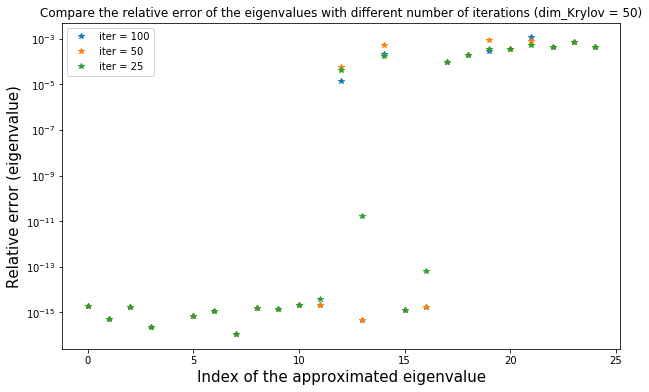

In [53]:
plt.figure(figsize = [10, 6])
plt.semilogy(range(25), err_eigens_50[0:25],  '*')
plt.semilogy(range(25), err_eigens_50_iter_50[0:25], '*')
plt.semilogy(range(25), err_eigens_50_iter_25[0:25], '*')
plt.legend(['iter = 100', 'iter = 50', 'iter = 25'])
plt.title('Compare the relative error of the eigenvalues with different number of iterations (dim_Krylov = 50)', fontsize = 12)
plt.xlabel('Index of the approximated eigenvalue', fontsize = 15)
plt.ylabel('Relative error (eigenvalue)', fontsize = 15)
plt.savefig('three iters.pdf')

Text(0.5, 0, 'number of the eigenvalues')

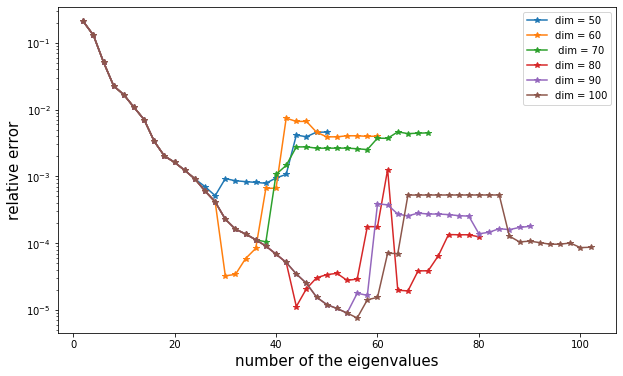

In [55]:
plt.figure(figsize = [10, 6])
plt.semilogy(2*np.array(range(1, 25+1)), dim_50, '*-')
plt.semilogy(2*np.array(range(1, 30+1)), dim_60, '*-')
plt.semilogy(2*np.array(range(1, 35+1)), dim_70, '*-')
plt.semilogy(2*np.array(range(1, 40+1)), dim_80, '*-')
plt.semilogy(2*np.array(range(1, len(dim_90)+1)), dim_90, '*-')
plt.semilogy(2*np.array(range(1, len(dim_100)+1)), dim_100, '*-')

plt.legend(['dim = 50', 'dim = 60',' dim = 70', 'dim = 80', 'dim = 90', 'dim = 100'])
plt.ylabel('relative error', fontsize = 15)
plt.xlabel('number of the eigenvalues', fontsize = 15)

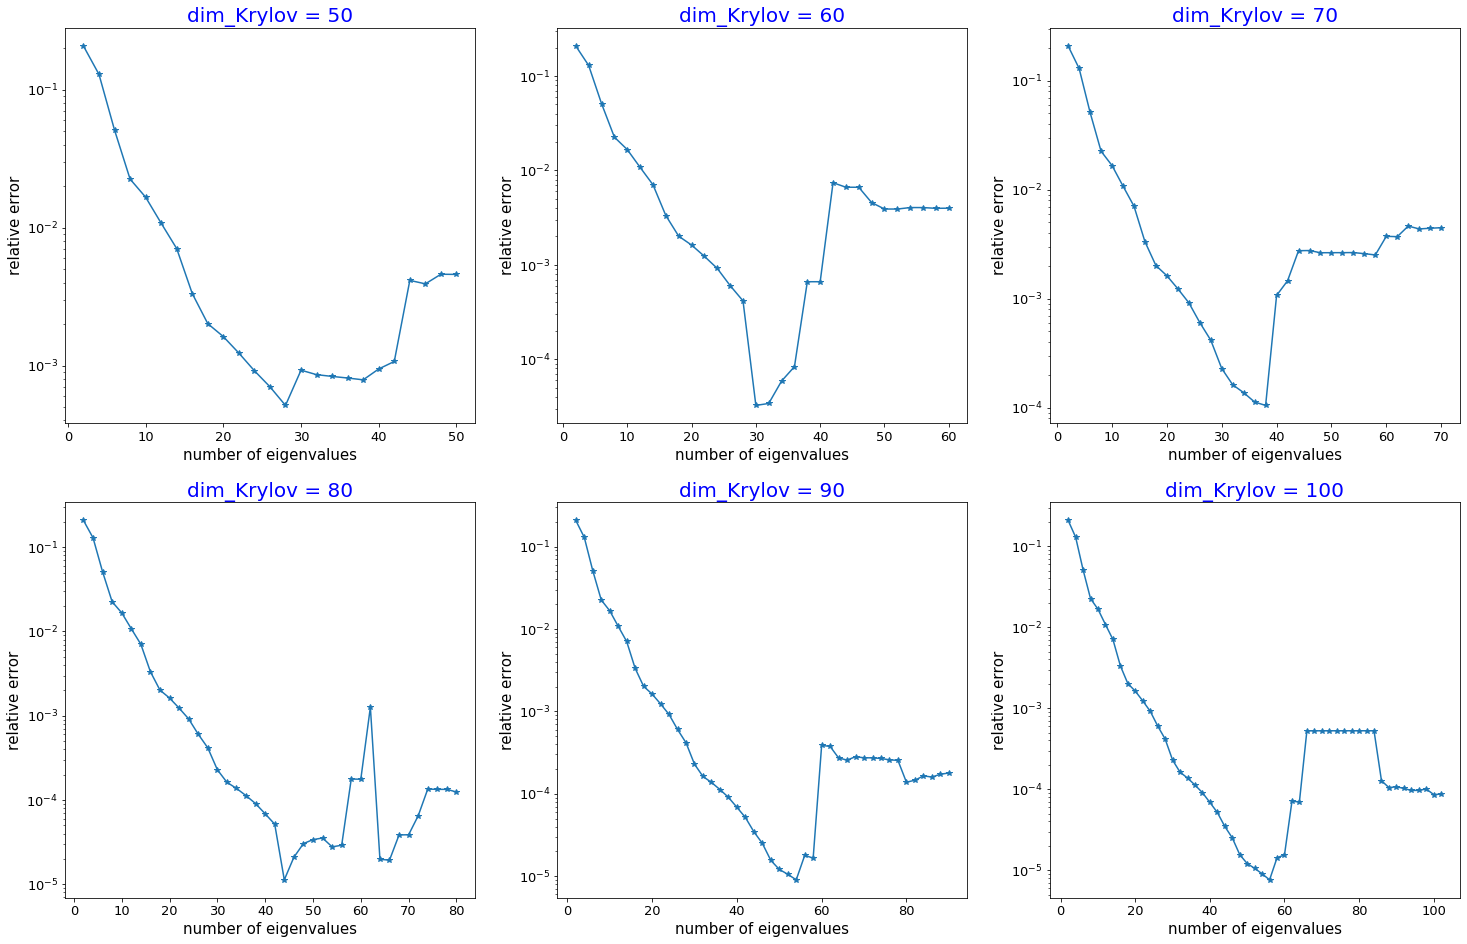

In [56]:
fig, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(25, 16))
ax1.semilogy(2*np.array(range(1, 25+1)), dim_50, '*-')
ax1.set_xlabel('number of eigenvalues', fontsize = 15)
ax1.set_ylabel('relative error', fontsize = 15)
ax1.set_title('dim_Krylov = 50', fontsize = 20, color='b')
ax1.tick_params(axis='x', labelsize= 13)
ax1.tick_params(axis='y', labelsize= 13)

ax2.semilogy(2*np.array(range(1, 30+1)), dim_60, '*-')
ax2.set_xlabel('number of eigenvalues', fontsize = 15)
ax2.set_ylabel('relative error', fontsize = 15)
ax2.set_title('dim_Krylov = 60', fontsize = 20, color='b')
ax2.tick_params(axis='x', labelsize= 13)
ax2.tick_params(axis='y', labelsize= 13)

ax3.semilogy(2*np.array(range(1, 35+1)), dim_70, '*-')
ax3.set_xlabel('number of eigenvalues', fontsize = 15)
ax3.set_ylabel('relative error', fontsize = 15)
ax3.set_title('dim_Krylov = 70', fontsize = 20, color='b')
ax3.tick_params(axis='x', labelsize= 13)
ax3.tick_params(axis='y', labelsize= 13)

ax4.semilogy(2*np.array(range(1, 40+1)), dim_80, '*-')
ax4.set_xlabel('number of eigenvalues', fontsize = 15)
ax4.set_ylabel('relative error', fontsize = 15)
ax4.set_title('dim_Krylov = 80', fontsize = 20, color='b')
ax4.tick_params(axis='x', labelsize= 13)
ax4.tick_params(axis='y', labelsize= 13)

ax5.semilogy(2*np.array(range(1, len(dim_90)+1)), dim_90, '*-')
ax5.set_xlabel('number of eigenvalues', fontsize = 15)
ax5.set_ylabel('relative error', fontsize = 15)
ax5.set_title('dim_Krylov = 90', fontsize = 20, color='b')
ax5.tick_params(axis='x', labelsize= 13)
ax5.tick_params(axis='y', labelsize= 13)

ax6.semilogy(2*np.array(range(1, len(dim_100)+1)), dim_100, '*-')
ax6.set_xlabel('number of eigenvalues', fontsize = 15)
ax6.set_ylabel('relative error', fontsize = 15)
ax6.set_title('dim_Krylov = 100', fontsize = 20, color='b')
ax6.tick_params(axis='x', labelsize= 13)
ax6.tick_params(axis='y', labelsize= 13)

plt.savefig('inverse_free.pdf')

In [42]:
num = 25
result_1_50 = []
for index_ in range(num):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(10):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 50, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[index_]
        v_index = list(evalue).index(evalue[index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_1_50.append(rho_)

result_2_50 = []
for index_ in range(1, num+1):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(10):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 50, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[-index_]
        v_index = list(evalue).index(evalue[-index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_2_50.append(rho_)
    
result_50 = result_1_50 + result_2_50

In [43]:
print(result_1_50)

[0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737987190069535, 0.97909310969107, 0.9791039368998472, 0.9875697482945321, 0.9932273305554089, 0.9932346843908796, 0.9939224875522495, 0.9943353192251906, 0.9953101015920445, 0.9954569556135805, 0.9972053230845198, 0.9982935277451418, 0.9983936129915764, 0.9985897539158547, 0.9987307191055018, 0.9989478828725707, 0.9992758093847258, 0.9993598076696287, 0.9996565616095765, 0.9998034131002784]


In [44]:
err_eigens_50 = []
for i in range(25):
    err_eigens_50.append(abs(sorted(evals)[i] - result_1_50[i])/sorted(evals)[i])
for j in range(25):
    err_eigens_50.append(abs((sorted(evals)[-25:])[j] - sorted(result_2_50)[j])/(sorted(evals)[-25:])[j])

In [45]:
print(err_eigens_50)

[(1.8973682188561144e-15+0j), (4.910793961406313e-16+0j), (1.7186379244929954e-15+0j), (2.3566774005797236e-16+0j), 0j, (9.573315292618778e-06+0j), (1.1339299742140566e-15+0j), (1.1339174348950877e-16+0j), (1.5738759081669081e-15+0j), (1.4531315113989296e-15+0j), (8.730878940446467e-09+0j), (2.680828024791316e-15+0j), (0.00040014149341988727+0j), (3.3686722650609185e-14+0j), (0.00014260567579271296+0j), (1.22466787813583e-15+0j), (3.9751913799479015e-10+0j), (9.634536686790097e-05+0j), (0.00019729584470075612+0j), (0.00033680691265980514+0j), (0.00035954355906524205+0j), (0.0006859022916670121+0j), (0.0004211163108552746+0j), (0.0007120348481374395+0j), (0.00044389602098830565+0j), (0.0004358200938588422+0j), (0.0007359210339603946+0j), (0.0006539786051472639+0j), (0.0008326430846215838+0j), (0.0005253673018196398+0j), (0.0005483693558463954+0j), (0.00019739183048135808+0j), (9.676789524578769e-05+0j), (8.84109774020234e-05+0j), (0.0010851938571590624+0j), (0.0018814902936322088+0j), (

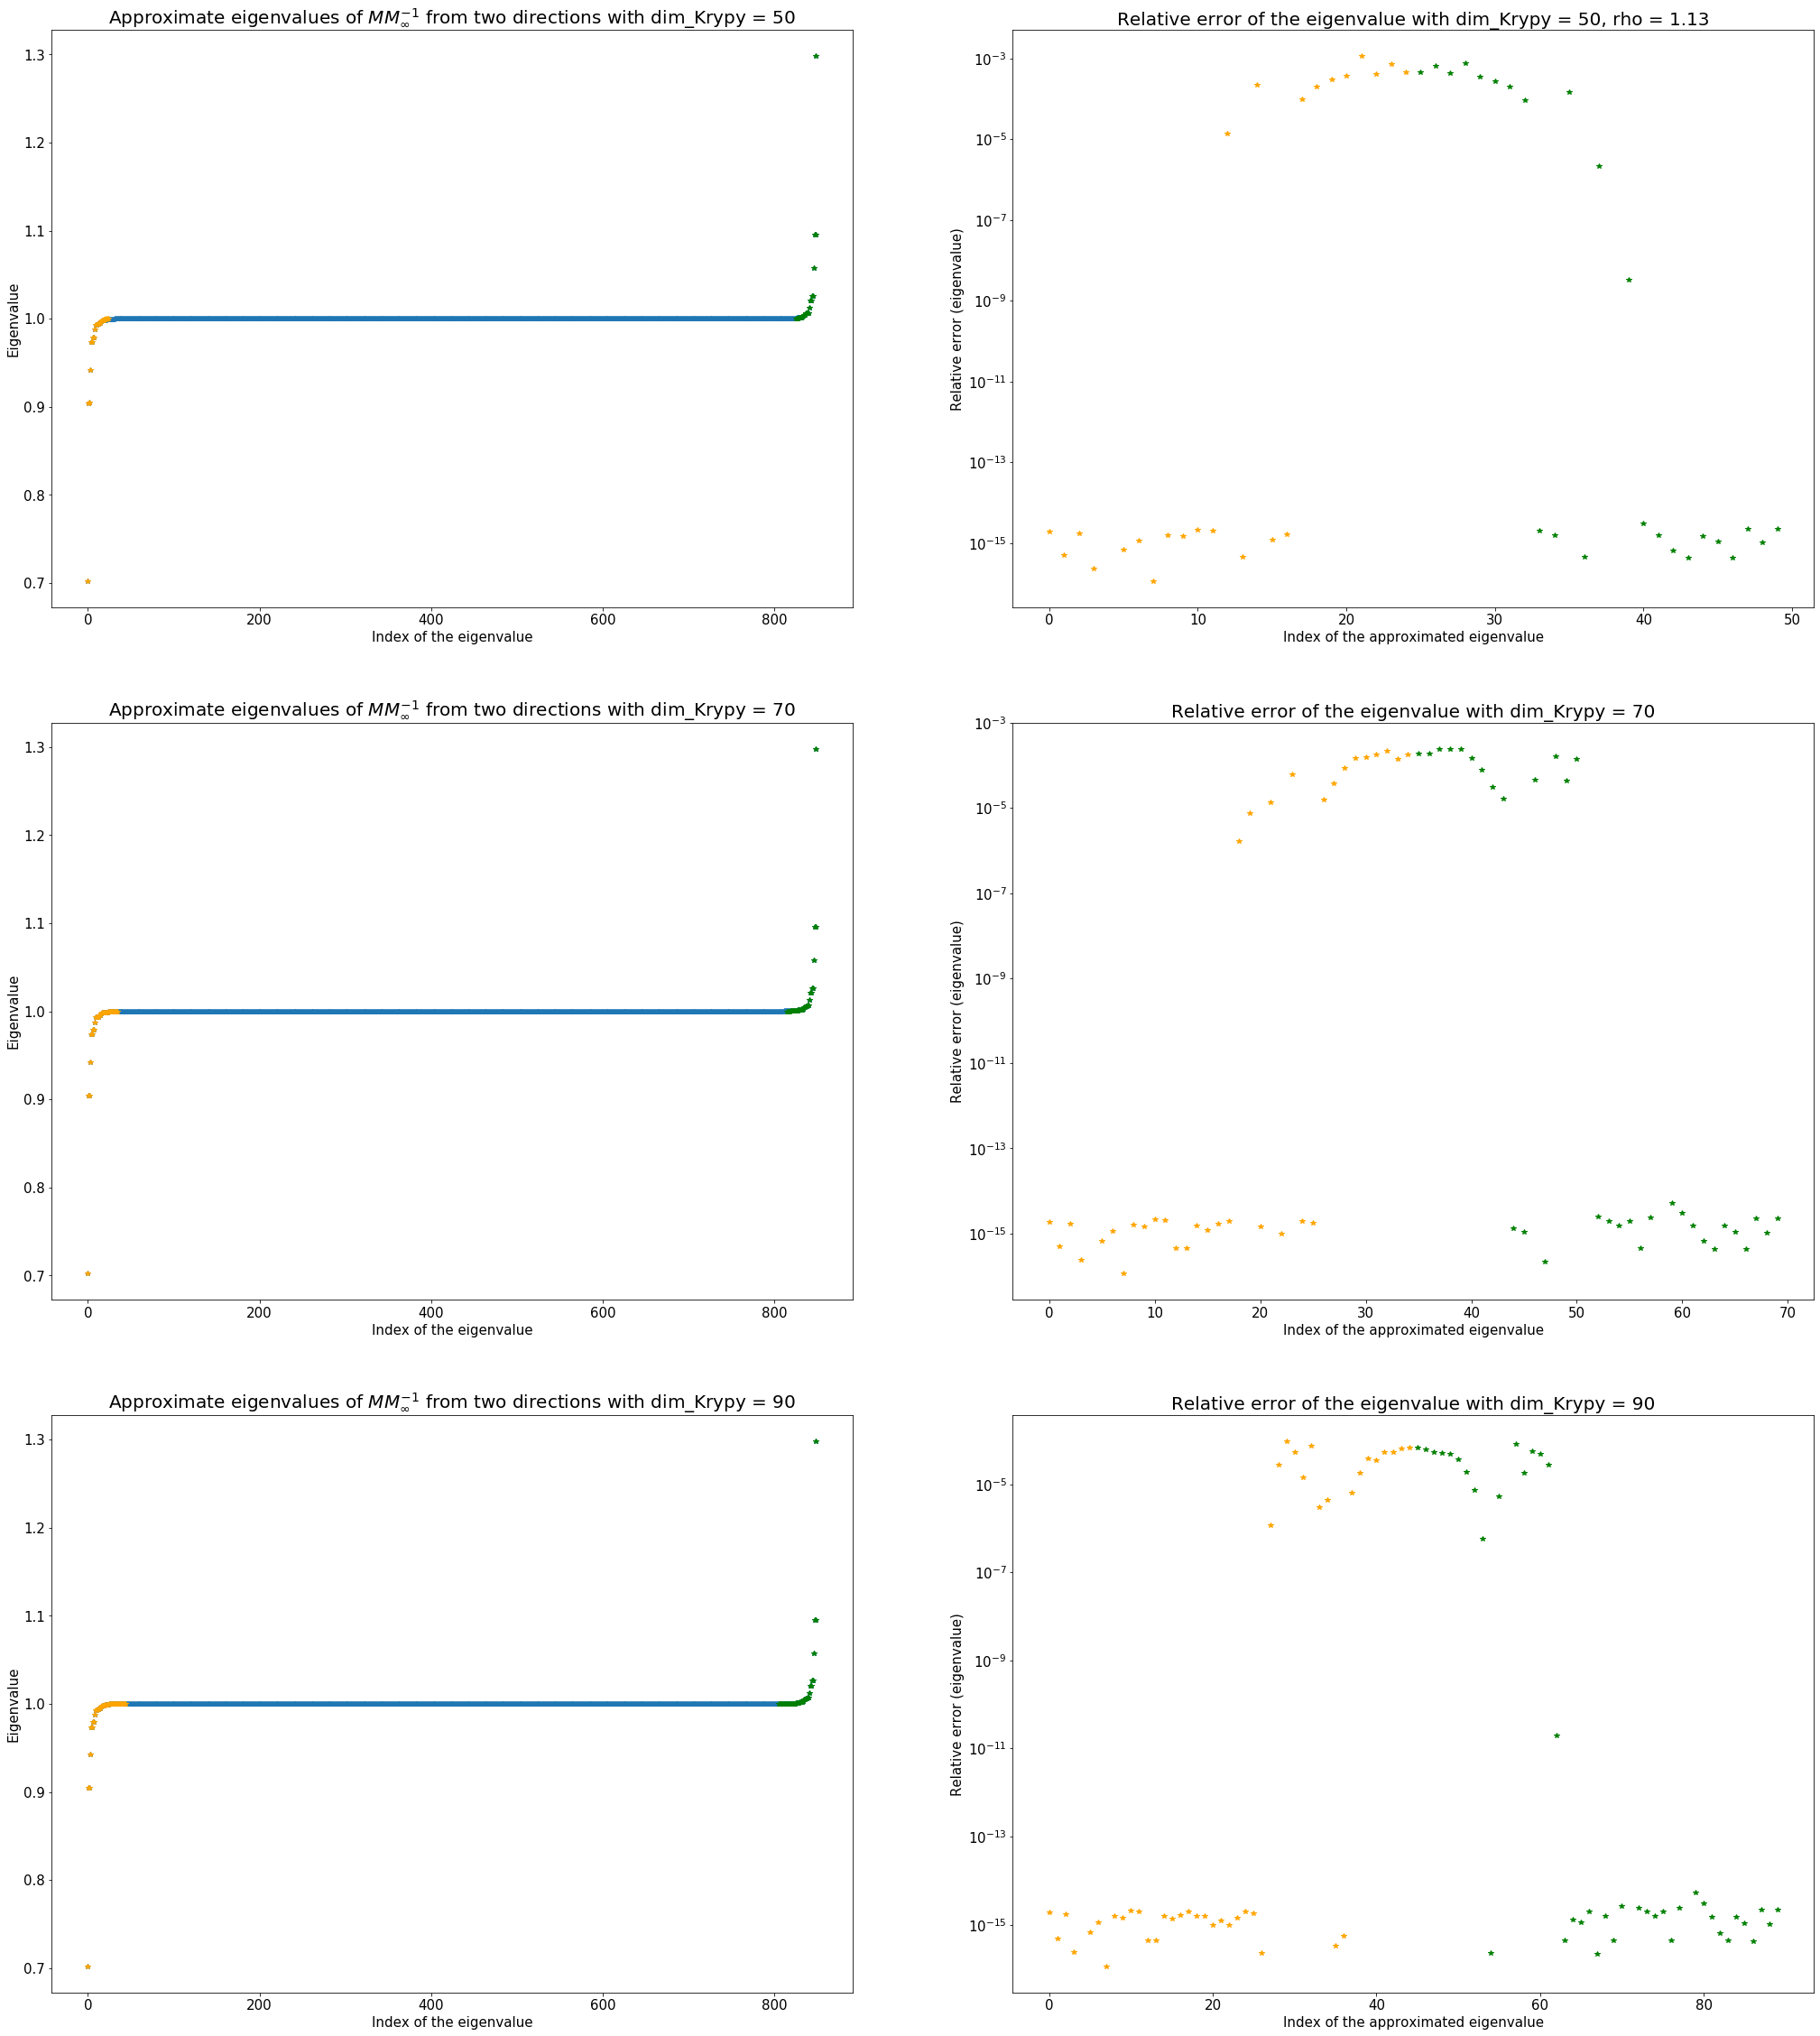

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(3, 2, figsize=(35, 40))
ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(25), result_50[0:25], '*', color = 'orange')
ax1.plot(range(len(evals)-25, len(evals)), sorted(result_50)[25:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 50', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(25), err_eigens_50[0:25], '*', color = 'orange')
ax2.semilogy(range(25,50), err_eigens_50[25:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 50, rho = 1.13', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

ax3.plot(range(len(evals)), sorted(evals) , '*')
ax3.plot(range(35), result_70[0:35], '*', color = 'orange')
ax3.plot(range(len(evals)-35, len(evals)), sorted(result_70)[35:], 'g*')
ax3.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax3.set_ylabel('Eigenvalue', fontsize = 15)
ax3.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 70', fontsize = 20)
ax3.tick_params(axis='x', labelsize= 15)
ax3.tick_params(axis='y', labelsize= 15)

ax4.semilogy(range(35), err_eigens_70[0:35], '*', color = 'orange')
ax4.semilogy(range(35,70), err_eigens_70[35:], 'g*')
ax4.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax4.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax4.set_title('Relative error of the eigenvalue with dim_Krypy = 70', fontsize = 20)
ax4.tick_params(axis='x', labelsize= 15)
ax4.tick_params(axis='y', labelsize= 15)

ax5.plot(range(len(evals)), sorted(evals) , '*')
ax5.plot(range(45), result_90[0:45], '*', color = 'orange')
ax5.plot(range(len(evals)-45, len(evals)), sorted(result_90)[45:], 'g*')
ax5.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax5.set_ylabel('Eigenvalue', fontsize = 15)
ax5.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 90', fontsize = 20)
ax5.tick_params(axis='x', labelsize= 15)
ax5.tick_params(axis='y', labelsize= 15)

ax6.semilogy(range(45), err_eigens_90[0:45], '*', color = 'orange')
ax6.semilogy(range(45,90), err_eigens_90[45:], 'g*')
ax6.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax6.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax6.set_title('Relative error of the eigenvalue with dim_Krypy = 90', fontsize = 20)
ax6.tick_params(axis='x', labelsize= 15)
ax6.tick_params(axis='y', labelsize= 15)
fig.savefig('dim 50 70 90.pdf')

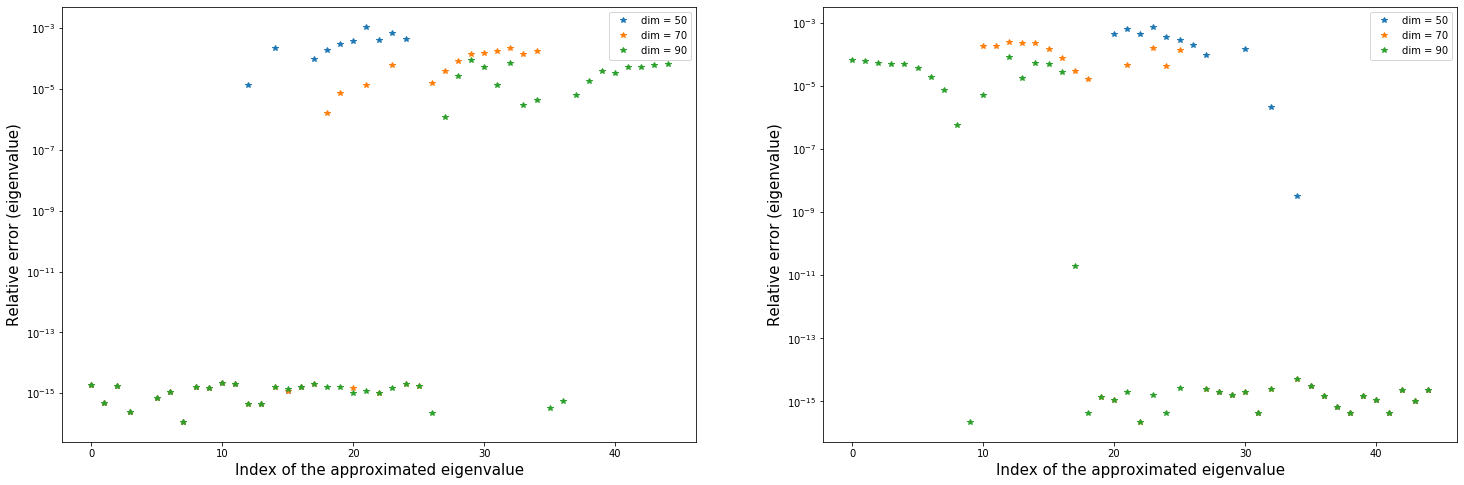

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
ax1.semilogy(range(25), err_eigens_50[0:25], '*')
ax1.semilogy(range(35), err_eigens_70[0:35], '*')
ax1.semilogy(range(45), err_eigens_90[0:45], '*')
ax1.legend(['dim = 50', 'dim = 70', 'dim = 90'])
ax1.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax1.set_ylabel('Relative error (eigenvalue)', fontsize = 15)

ax2.semilogy(range(20, 45), err_eigens_50[25:], '*')
ax2.semilogy(range(10,45), err_eigens_70[35:], '*')
ax2.semilogy(range(45), err_eigens_90[45:], '*')
ax2.legend(['dim = 50', 'dim = 70', 'dim = 90'])
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
fig.savefig('put three graphs together.pdf')

Text(0, 0.5, 'Relative error (eigenvalue)')

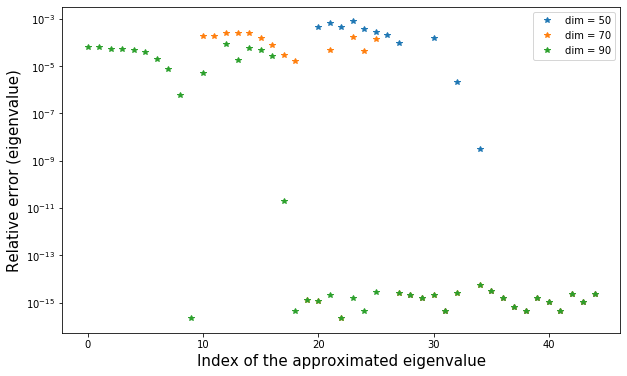

In [23]:
plt.figure(figsize = [10,6])
plt.semilogy(range(20, 45), err_eigens_50[25:], '*')
plt.semilogy(range(10,45), err_eigens_70[35:], '*')
plt.semilogy(range(45), err_eigens_90[45:], '*')
plt.legend(['dim = 50', 'dim = 70', 'dim = 90'])
plt.xlabel('Index of the approximated eigenvalue', fontsize = 15)
plt.ylabel('Relative error (eigenvalue)', fontsize = 15)

/home/xiaoshu/.conda/envs/opencl/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


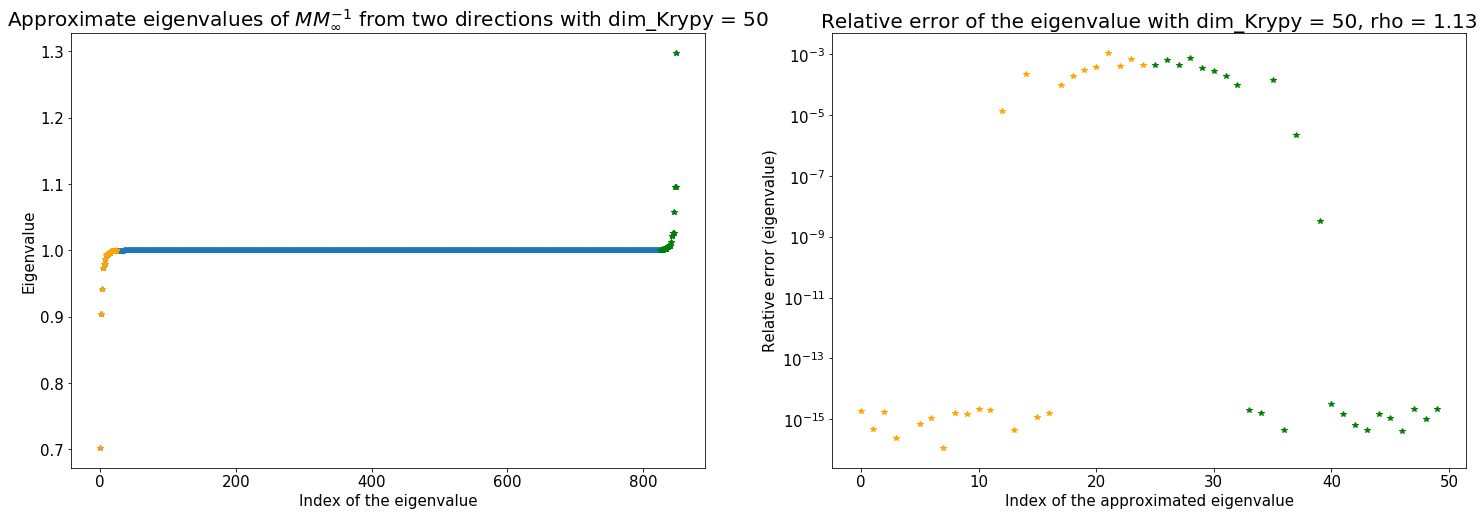

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(25), result_50[0:25], '*', color = 'orange')
ax1.plot(range(len(evals)-25, len(evals)), sorted(result_50)[25:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 50', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(25), err_eigens_50[0:25], '*', color = 'orange')
ax2.semilogy(range(25,50), err_eigens_50[25:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 50, rho = 1.13', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)
#plt.savefig('dim of Kry 50.pdf')

In [6]:
num = 25
result_1_50_rho_one = []
for index_ in range(num):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = 1
    
    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 50, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[index_]
        v_index = list(evalue).index(evalue[index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_1_50_rho_one.append(rho_)

result_2_50_rho_one = []
for index_ in range(1, num+1):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 50, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[-index_]
        v_index = list(evalue).index(evalue[-index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_2_50_rho_one.append(rho_)
    
result_50_rho_one = result_1_50_rho_one + result_2_50_rho_one

In [7]:
err_eigens_50_rho_one = []
for i in range(25):
    err_eigens_50_rho_one.append(abs(sorted(evals)[i] - result_1_50_rho_one[i])/sorted(evals)[i])
for j in range(25):
    err_eigens_50_rho_one.append(abs((sorted(evals)[-25:])[j] - sorted(result_2_50_rho_one)[j])/(sorted(evals)[-25:])[j])

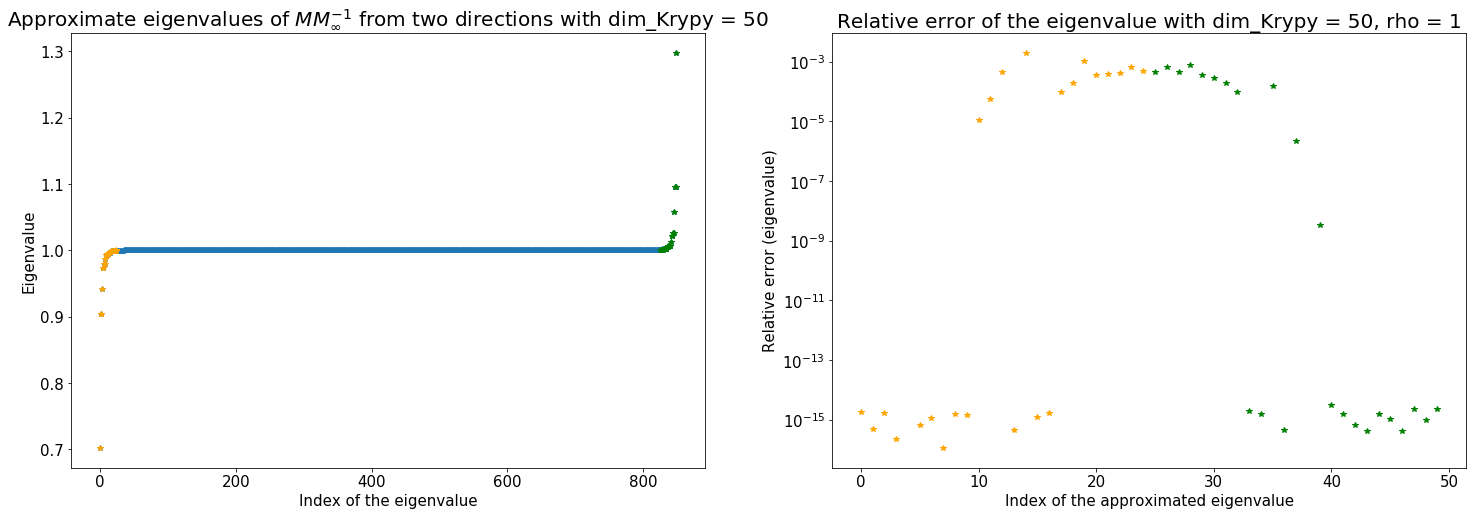

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(25), result_50_rho_one[0:25], '*', color = 'orange')
ax1.plot(range(len(evals)-25, len(evals)), sorted(result_50_rho_one)[25:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 50', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(25), err_eigens_50_rho_one[0:25], '*', color = 'orange')
ax2.semilogy(range(25,50), err_eigens_50_rho_one[25:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 50, rho = 1', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

/home/xiaoshu/.conda/envs/opencl/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


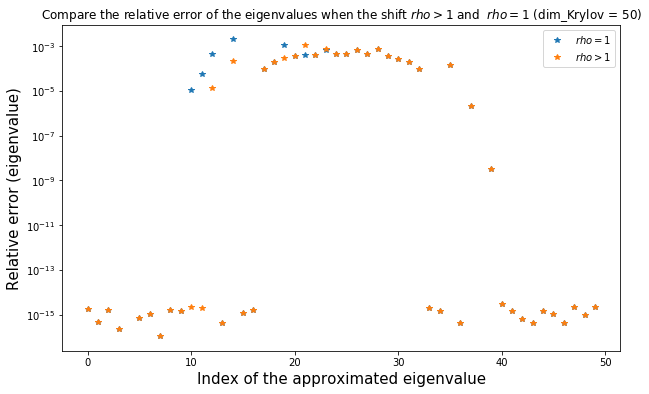

In [41]:
plt.figure(figsize = [10,6])
plt.semilogy(range(50), err_eigens_50_rho_one, '*')
plt.semilogy(range(50), err_eigens_50, '*')
plt.legend(['$rho = 1$', '$rho > 1$'])
plt.title('Compare the relative error of the eigenvalues when the shift $rho > 1$ and  $rho = 1$ (dim_Krylov = 50)', fontsize = 12)
plt.xlabel('Index of the approximated eigenvalue', fontsize = 15)
plt.ylabel('Relative error (eigenvalue)', fontsize = 15)
plt.savefig('compare the shift.pdf')

In [5]:
num = 30
result_1_60_rho_one = []
for index_ in range(num):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = 1
    
    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 60, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[index_]
        v_index = list(evalue).index(evalue[index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_1_60_rho_one.append(rho_)

result_2_60_rho_one = []
for index_ in range(1, num+1):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 60, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[-index_]
        v_index = list(evalue).index(evalue[-index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_2_60_rho_one.append(rho_)
    
result_60_rho_one = result_1_60_rho_one + result_2_60_rho_one

In [6]:
err_eigens_60_rho_one = []
for i in range(30):
    err_eigens_60_rho_one.append(abs(sorted(evals)[i] - result_1_60_rho_one[i])/sorted(evals)[i])
for j in range(30):
    err_eigens_60_rho_one.append(abs((sorted(evals)[-30:])[j] - sorted(result_2_60_rho_one)[j])/(sorted(evals)[-30:])[j])

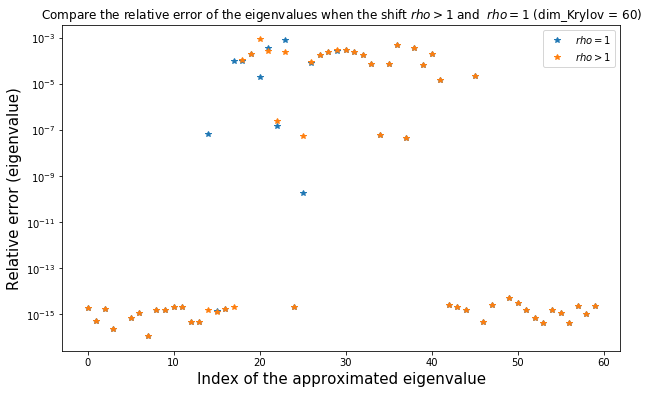

In [10]:
plt.figure(figsize = [10,6])
plt.semilogy(range(60), err_eigens_60_rho_one, '*')
plt.semilogy(range(60), err_eigens_60, '*')
plt.legend(['$rho = 1$', '$rho > 1$'])
plt.title('Compare the relative error of the eigenvalues when the shift $rho > 1$ and  $rho = 1$ (dim_Krylov = 60)', fontsize = 12)
plt.xlabel('Index of the approximated eigenvalue', fontsize = 15)
plt.ylabel('Relative error (eigenvalue)', fontsize = 15)
plt.savefig('compare the shift dim = 60.pdf')

In [12]:
num = 30
result_1_60 = []
for index_ in range(num):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 60, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[index_]
        v_index = list(evalue).index(evalue[index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_1_60.append(rho_)

result_2_60 = []
for index_ in range(1, num+1):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 60, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[-index_]
        v_index = list(evalue).index(evalue[-index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_2_60.append(rho_)

In [13]:
err_eigens_60 = []
for i in range(30):
    err_eigens_60.append(abs(sorted(evals)[i] - result_1_60[i])/sorted(evals)[i])
for j in range(30):
    err_eigens_60.append(abs((sorted(evals)[-30:])[j] - sorted(result_2_60)[j])/(sorted(evals)[-30:])[j])

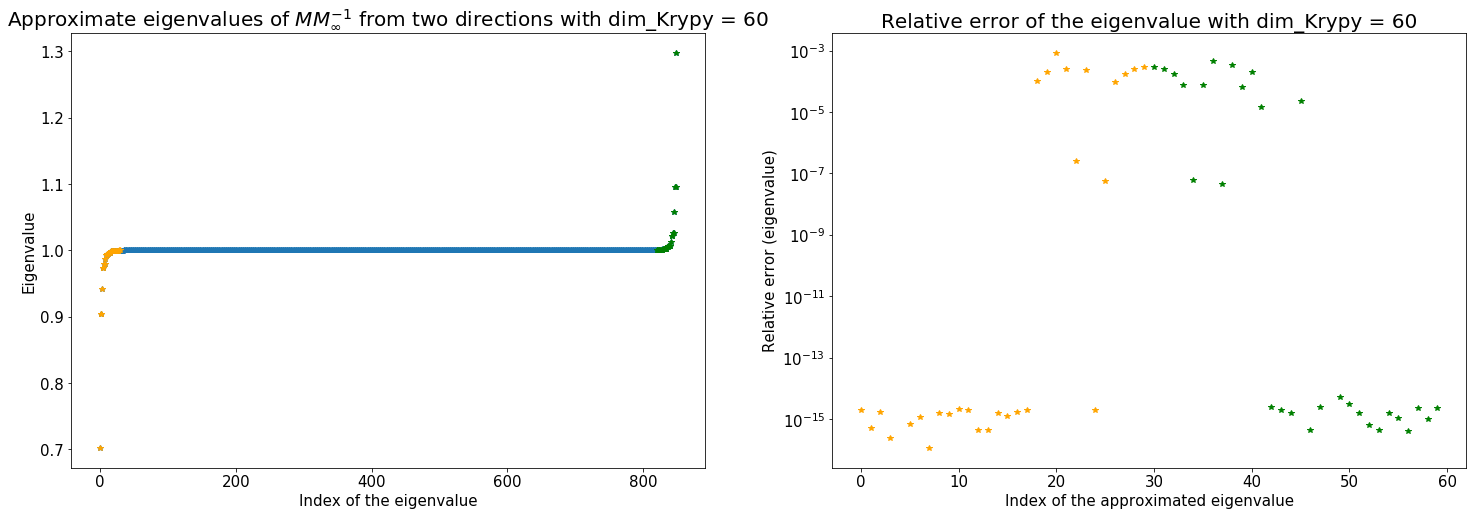

In [14]:
result_60 = result_1_60 + result_2_60
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(30), result_60[0:30], '*', color = 'orange')
ax1.plot(range(len(evals)-30, len(evals)), sorted(result_60)[30:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 60', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(30), err_eigens_60[0:30], '*', color = 'orange')
ax2.semilogy(range(30,60), err_eigens_60[30:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 60', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

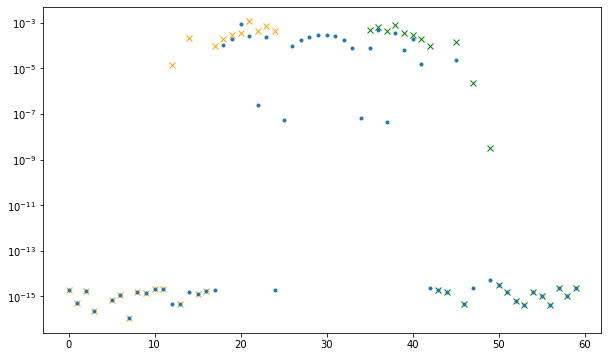

In [63]:
plt.figure(figsize = [10,6])
plt.semilogy(range(25), err_eigens_50[0:25], '*', color = 'orange', marker = 'x')
plt.semilogy(range(35, 60), err_eigens_50[25:], 'g*', marker = 'x')
plt.semilogy(range(60), err_eigens_60, '*', marker = '.')

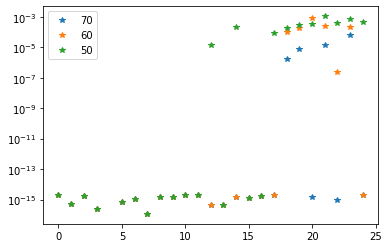

In [68]:
plt.semilogy(range(25), err_eigens_70[0:25], '*')
plt.semilogy(range(25), err_eigens_60[0:25], '*')
plt.semilogy(range(25), err_eigens_50[0:25], '*')
plt.legend(['70', '60', '50'])

In [16]:
num = 35
result_1_70 = []
for index_ in range(num):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 70, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[index_]
        v_index = list(evalue).index(evalue[index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_1_70.append(rho_)

result_2_70 = []
for index_ in range(1, num+1):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 70, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[-index_]
        v_index = list(evalue).index(evalue[-index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_2_70.append(rho_)

In [17]:
err_eigens_70 = []
for i in range(35):
    err_eigens_70.append(abs(sorted(evals)[i] - result_1_70[i])/sorted(evals)[i])
for j in range(35):
    err_eigens_70.append(abs((sorted(evals)[-35:])[j] - sorted(result_2_70)[j])/(sorted(evals)[-35:])[j])

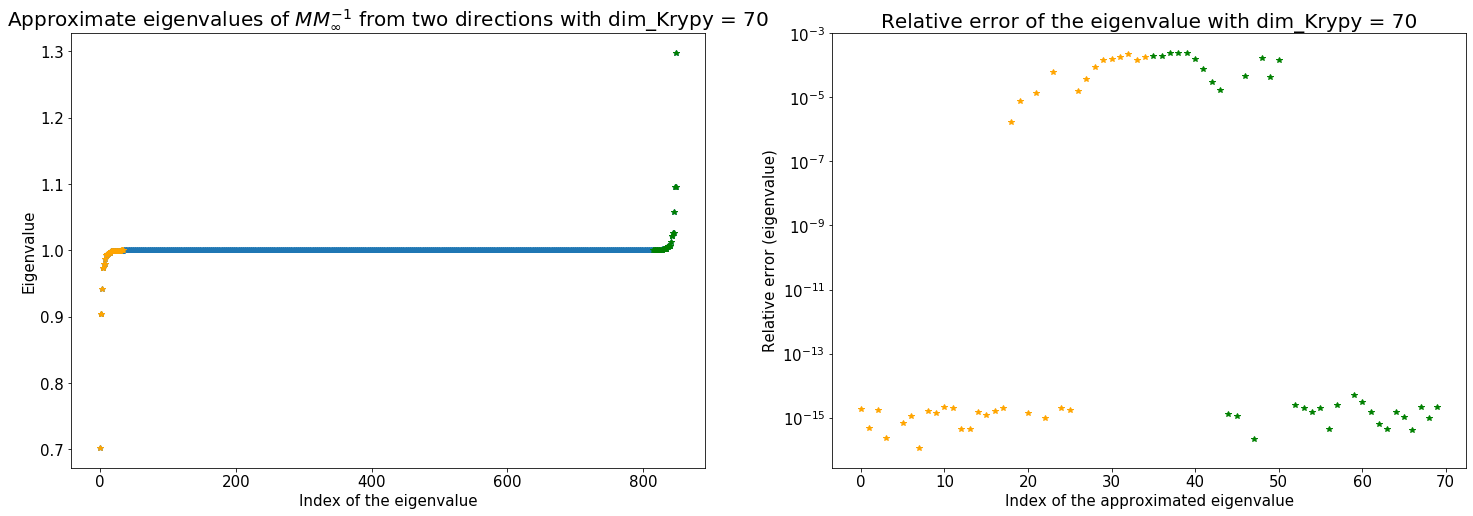

In [18]:
result_70 = result_1_70 + result_2_70
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(35), result_70[0:35], '*', color = 'orange')
ax1.plot(range(len(evals)-35, len(evals)), sorted(result_70)[35:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 70', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(35), err_eigens_70[0:35], '*', color = 'orange')
ax2.semilogy(range(35,70), err_eigens_70[35:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 70', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

In [39]:
print(result_70)

[0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592779, 0.9983944540107583, 0.9984019759720857, 0.9985888466845895, 0.998604447357354, 0.998939138105022, 0.9990084508122292, 0.999359801260965, 0.9995765993209056, 0.9995931995361323, 0.9996306214021193, 0.9996796909034725, 0.9997686788989301, 0.9997761422796743, 0.9998490875085752, 0.9998934042531672, 0.9999138907742184, 0.999956182786501, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548

In [ ]:
num = 40
result_1_80 = []
for index_ in range(num):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 80, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[index_]
        v_index = list(evalue).index(evalue[index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_1_80.append(rho_)

result_2_80 = []
for index_ in range(1, num+1):
    x = np.ones(combined.shape[0]) / np.linalg.norm(np.ones(combined.shape[0]))

    rho_ = (x.T @ mat @ x)/(x.T @ mat2 @ x)

    for k in range(100):
        V_m, H_m = krypy.utils.arnoldi((mat - rho_*mat2), x.reshape(combined.shape[0],1), maxiter = 80, ortho ='dmgs')
        A_m = V_m.T @ (mat - rho_*mat2) @ V_m
        B_m = V_m.T @ mat2 @ V_m
        evalue, evect = scipy.linalg.eigh(A_m, B_m, eigvals_only=False)
        mu_ = evalue[-index_]
        v_index = list(evalue).index(evalue[-index_])
        v_ = evect[:,v_index]
        rho_ += mu_
        x = V_m @ v_
    result_2_80.append(rho_)

In [ ]:
result_80 = result_1_80 + result_2_80

In [ ]:
err_eigens_80 = []
for i in range(40):
    err_eigens_80.append(abs(sorted(evals)[i] - result_1_80[i])/sorted(evals)[i])
for j in range(40):
    err_eigens_80.append(abs((sorted(evals)[-40:])[j] - sorted(result_2_80)[j])/(sorted(evals)[-40:])[j])

In [35]:
result_80 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592778, 0.9983927751699329, 0.9983944529521848, 0.9985888466845899, 0.998590873616076, 0.998939138105022, 0.9989452777604301, 0.999359801260965, 0.9995765993209056, 0.9995936483023001, 0.9996209016513438, 0.999651922980221, 0.9996700468032702, 0.9998119091894148, 0.9997680457143734, 0.9997718373709988, 0.9999519513058359, 0.9998490875085742, 0.9998937046775819, 0.999904511065067, 0.9999298341762752, 0.9999551146834625, 0.9999806554178965, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0016055470478153, 1.0014111533154102, 1.0014037324083476, 1.001060861894978, 1.0010547222395698, 1.000640198739035, 1.0004234006790944, 1.000407408300299, 1.0003790983486562, 1.0003723935579203, 1.0003299532082965, 1.0003158018199994, 1.000085984069143, 1.0002281629774232, 1.0000412722748082, 1.000150912491425, 1.000103225045705, 1.0000873153391734, 1.0000702945374462, 1.0000448907629247, 1.0000204242111086]

/home/xiaoshu/.conda/envs/opencl/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


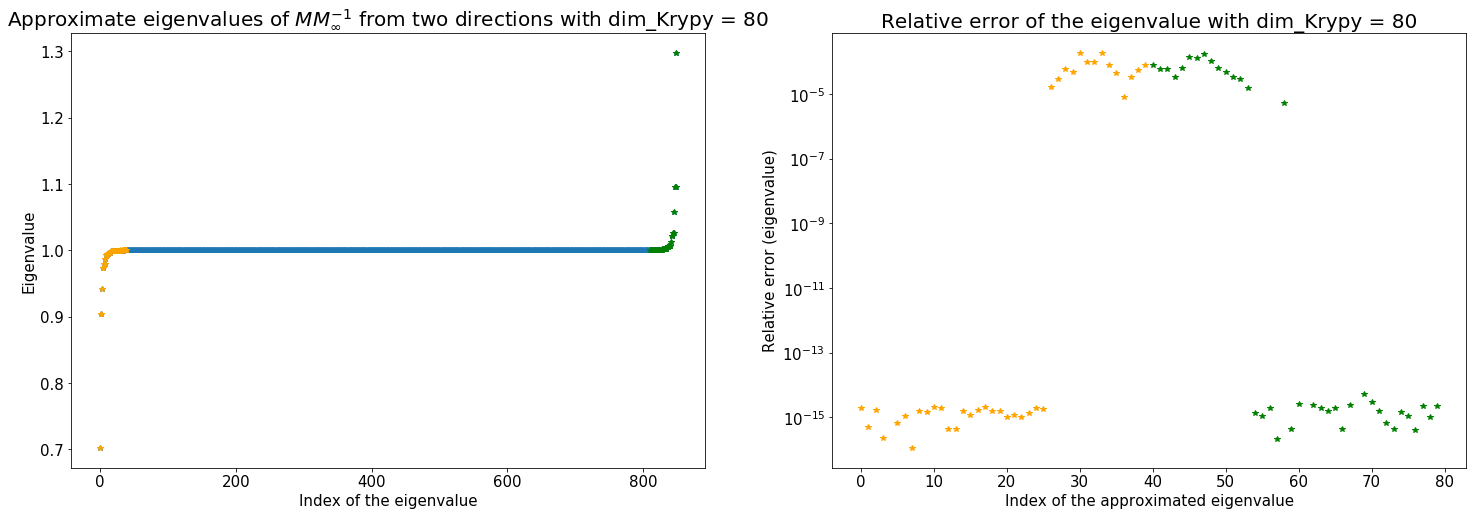

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(40), result_80[0:40], '*', color = 'orange')
ax1.plot(range(len(evals)-40, len(evals)), sorted(result_80)[40:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 80', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(40), err_eigens_80[0:40], '*', color = 'orange')
ax2.semilogy(range(40,80), err_eigens_80[40:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 80', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

In [46]:
result_90 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845199, 0.9982935273482993, 0.9982974316592779, 0.9983927751699329, 0.9983944529521848, 0.9985888466845899, 0.998590873616076, 0.998939138105022, 0.9989452777604302, 0.999359801260965, 0.9995765993209056, 0.9995770996129769, 0.9995937892683936, 0.9996209016512936, 0.9997135365951771, 0.9996762355701305, 0.9996840199378034, 0.9997497535785819, 0.99977173774036, 0.9997761620805155, 0.9998490875085752, 0.9998961869164954, 0.9999030779381555, 0.999918084326969, 0.9999397742296938, 0.9999389243881077, 0.9999575835191392, 0.9999659575415781, 0.9999771211389687, 0.9999907963829159, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0016055470478153, 1.0014111533154102, 1.001409126383924, 1.001060861894978, 1.0010547222395698, 1.000640198739035, 1.0004234006790944, 1.000422900387023, 1.0004074082802312, 1.000379098348156, 1.0003299532082965, 1.0003225401199325, 1.0002401399239447, 1.000312280288068, 1.000231290740938, 1.0002228931344062, 1.000150912491425, 1.000103228441976, 1.000095801602174, 1.0000814249931325, 1.0000466541796822, 1.0000619646920021, 1.0000446469590492, 1.0000334383343246, 1.0000243504039499, 1.0000099729700578]
result_100 = [0.7021660931758322, 0.9043124458898857, 0.9043860910573961, 0.9421934664049058, 0.9737525286945633, 0.9737893966140317, 0.97909310969107, 0.979103936899847, 0.9875697482945321, 0.9932273305554089, 0.99323467571907, 0.9939224875522542, 0.9939376035481411, 0.9953101015920114, 0.9953150180428074, 0.9972053230845198, 0.9982935273482993, 0.9982974316592779, 0.9983927751699329, 0.9983944529521848, 0.9985888466845899, 0.998590873616076, 0.998939138105022, 0.9989452777604301, 0.999359801260965, 0.9995765993209056, 0.9995770996129769, 0.999592591699701, 0.9995936644887969, 0.999621532566551, 0.9996384313998926, 0.999676235570172, 0.9996767106609663, 0.9997687092590619, 0.9997718373709988, 0.999849087508575, 0.9998961869164953, 0.9998996337378551, 0.9999047575409373, 0.9999137404988601, 0.9999238653252676, 0.9999724044076315, 0.999937886182143, 0.9999550096459614, 0.9999577290149365, 0.999965092151951, 0.999974749897996, 0.9999823248967128, 0.9999883221599092, 0.9999926392846618, 1.2978339068241678, 1.0956875541101143, 1.095613908942604, 1.0578065335950941, 1.0262474713054368, 1.0262106033859684, 1.02090689030893, 1.020896063100153, 1.0124302517054677, 1.006772669444591, 1.00676532428093, 1.0060775124477457, 1.006062396451859, 1.0046898984079886, 1.0046849819571926, 1.00279467691548, 1.0017064726517007, 1.0017025683407221, 1.0016072248300671, 1.0016055470478153, 1.0014111533154102, 1.001409126383924, 1.001060861894978, 1.0010547222395698, 1.000640198739035, 1.0004234006790944, 1.000422900387023, 1.000407408300299, 1.0004039388484662, 1.0003784662393285, 1.0003718137866309, 1.0003237644298286, 1.0002536284236307, 1.000231290740938, 1.000228162629001, 1.000150912491425, 1.0001038130835047, 1.0001003662621442, 1.0000952424591043, 1.0000862595011308, 1.0000761350313518, 1.000074383596278, 1.000064796900583, 1.0000446779425352, 1.000042877710935, 1.0000355675201973, 1.000025231985356, 1.000017212571929, 1.0000134025937542, 1.0000072313089599]

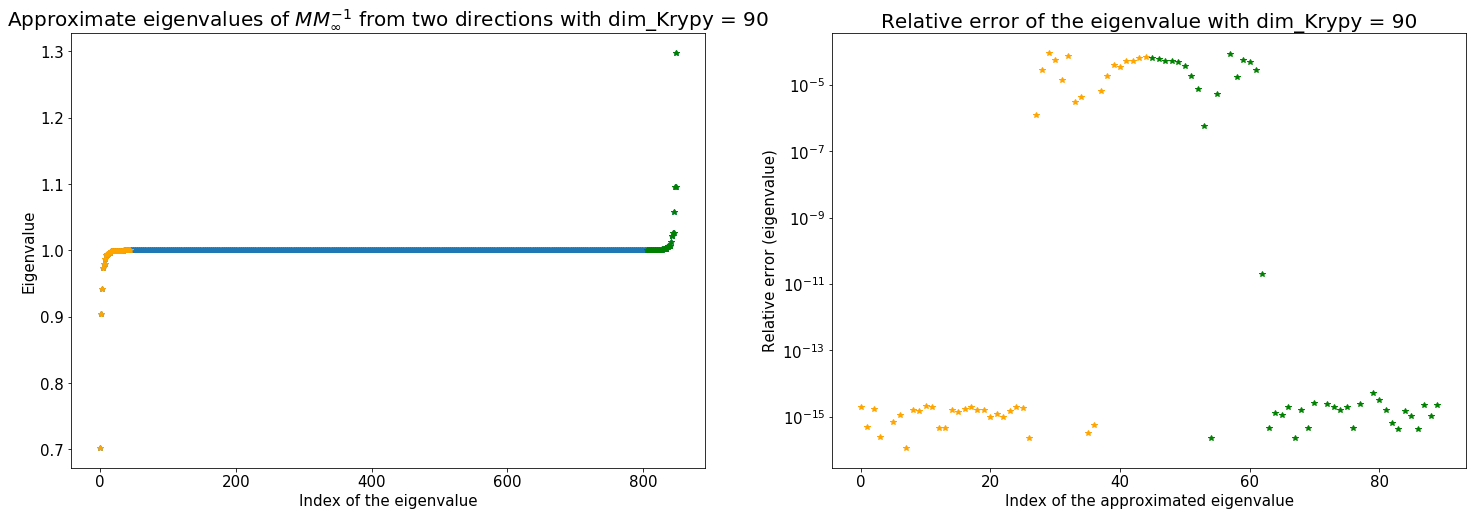

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(45), result_90[0:45], '*', color = 'orange')
ax1.plot(range(len(evals)-45, len(evals)), sorted(result_90)[45:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 90', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)

ax2.semilogy(range(45), err_eigens_90[0:45], '*', color = 'orange')
ax2.semilogy(range(45,90), err_eigens_90[45:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 90', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

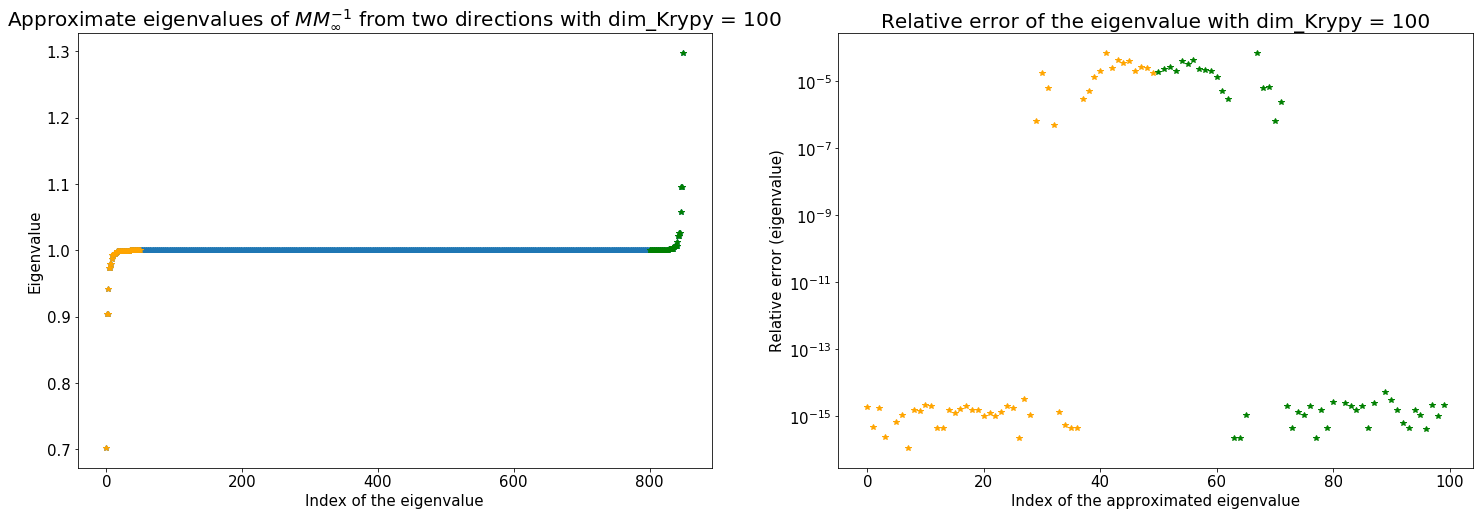

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
ax1.plot(range(len(evals)), sorted(evals) , '*')
ax1.plot(range(50), result_100[0:50], '*', color = 'orange')
ax1.plot(range(len(evals)-50, len(evals)), sorted(result_100)[50:], 'g*')
ax1.set_xlabel('Index of the eigenvalue', fontsize = 15)
ax1.set_ylabel('Eigenvalue', fontsize = 15)
ax1.set_title('Approximate eigenvalues of $MM_{\infty}^{-1}$ from two directions with dim_Krypy = 100', fontsize = 20)
ax1.tick_params(axis='x', labelsize= 15)
ax1.tick_params(axis='y', labelsize= 15)


ax2.semilogy(range(50), err_eigens_100[0:50], '*', color = 'orange')
ax2.semilogy(range(50,100), err_eigens_100[50:], 'g*')
ax2.set_xlabel('Index of the approximated eigenvalue', fontsize = 15)
ax2.set_ylabel('Relative error (eigenvalue)', fontsize = 15)
ax2.set_title('Relative error of the eigenvalue with dim_Krypy = 100', fontsize = 20)
ax2.tick_params(axis='x', labelsize= 15)
ax2.tick_params(axis='y', labelsize= 15)

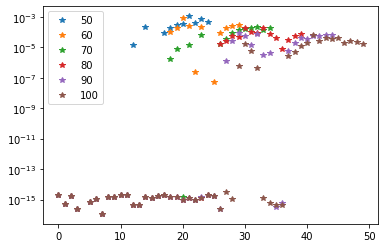

In [50]:
plt.semilogy(range(25), err_eigens_50[0:25], '*')
plt.semilogy(range(30), err_eigens_60[0:30], '*')
plt.semilogy(range(35), err_eigens_70[0:35], '*')
plt.semilogy(range(40), err_eigens_80[0:40], '*')
plt.semilogy(range(45), err_eigens_90[0:45], '*')
plt.semilogy(range(50), err_eigens_100[0:50], '*')
plt.legend(['50', '60', '70', '80', '90', '100'])